<a href="https://colab.research.google.com/github/Kunal2703/-LGMVIP-DataScience-intern-work/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BEGINNER LEVEL TASK**

**TASK-3 - Music Recommendation System**

Music recommender systems can suggest songs to users based on their listening patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ntr = 7000
nts = 3000

**Train**

In [3]:
Datasetlinks_train = '/content/train.csv'
train = pd.read_csv(Datasetlinks_train)

In [4]:
train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1.0
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1.0
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1.0
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1.0
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1.0


In [5]:
train.sample(10)


,msno,song_id,source_system_tab,source_screen_name,source_type,target
73598,BBtUEs+pHr0Ur0IQRW2tyCYU/8o2Gtbk8eFK0Yqvtc8=,6WzbUGfqebKBb81JDdTOfsDMpiaCxRPUlsvShaxN6RQ=,my library,Local playlist more,local-playlist,1.0
133778,PnBvpR0v+16YnIhqTKGkw1meVrULN/vzDn7/dnpZpik=,YL4TAUl/mo0fctdDWUIWZE3gSzpHfiX5r2zkN7YSM0A=,my library,Local playlist more,local-library,1.0
36854,lwk6JfHZNFCOdh1br5pbsuzAErwUENaJ9XX3Ve+daxE=,bCmDv8aIkMgo9OFaVMFaKcbaF8jLBJaINI70zGJwIE8=,discover,Unknown,online-playlist,1.0
136466,2djzicDDBTko3X1BdlJ5hDQyxTwQbexIB+mANJLyyH4=,nwSpTQoTbubQRzCAjsWTemzjG0B36aa5Dqpi2py8jsU=,my library,Local playlist more,local-playlist,1.0
34368,2daqiBpkH90ok3s9CMI8TVeP1oDQ/9Ag8Lpcw7l4Fnk=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,discover,Discover Chart,online-playlist,1.0
68382,zXLzFiB5jQaph3W2EyGi5DGsUloRPcoVTG4VI5ullew=,MbUrDuSZUHl97oQwk/GxAC+AIOxQd0wMpeBI4BU4PT8=,my library,Local playlist more,local-library,1.0
15609,Vh/2q2Y+ESQfcS4bXIdraSzryn/e1EHmpjUbvx+Bt00=,7IIuQyuHwKUBWAIXnxkWDEp9a7zgvzyIQECctVApr0o=,my library,Local playlist more,album,1.0
70861,fAuKrICAABN4opIBfbiULqcsnjn7seON7nlDQiGYIoY=,TIwOs7iFTKo3Cy2yiNReYYcZc1JyAx+0k08+z97k1dA=,my library,Local playlist more,local-library,1.0
130712,fW0sWrws1q94LHs2eAR91sGv3DCtDWQi4GIySu2ZiUo=,3DU6F6k6dFSdoQa2tsia5spMXFCxWh4JJdA3OxSo3rM=,discover,Online playlist more,online-playlist,0.0
110448,x9JYlJSBNsO+ikp41JA/A3QgISfzekspIBUutZUwCrA=,mjZq/9IKZUBtndU6Ed8VVExDZyT+Uo8ytMg3Kw7yuqM=,my library,NaN,local-library,1.0


In [6]:
train.shape



(179843, 6)

In [7]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [8]:
train.describe()


,target
count,179842.000000
mean,0.748346
std,0.433965
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179843 entries, 0 to 179842
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                179843 non-null  object 
 1   song_id             179842 non-null  object 
 2   source_system_tab   179305 non-null  object 
 3   source_screen_name  171640 non-null  object 
 4   source_type         179517 non-null  object 
 5   target              179842 non-null  float64
dtypes: float64(1), object(5)
memory usage: 8.2+ MB


**Songs**

In [10]:
Datasetlinks_song = '/content/songs.csv'

songs = pd.read_csv(Datasetlinks_song)


In [11]:
songs.head(10)


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520.0,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220.0,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793.0,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623.0,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629.0,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [12]:
songs.sample(10)


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
83290,Z5Xrh7Ax9KQf+w/1VrfkGj5jV0/9mFH8kjn/3hsbqIw=,259227.0,465,Jessie J,The Invisible Men| Jessica Cornish| Parker & J...,NaN,52.0
20493,blEcxKW1TTJL6Fer1YIYuHc7EDdYKqVHiKfnYaTzMRk=,322411.0,465,Leonard Cohen,Leonard Cohen| Sharon Robinson,Leonard Cohen| Sharon Robinson,52.0
112035,CORzZSdJi2/O6f6oerNKUW9TvtBX7OCVMyegBUVnE0k=,229923.0,465,Gorillaz,Damon Albarn| Jamie Hewlett,NaN,52.0
90002,dw0Tmwviv94CARbJAJGERBLKQO/xkvVWBYfOnF3A91Q=,190171.0,465,The Red Jumpsuit Apparatus,The Red Jumpsuit Apparatus,NaN,52.0
139036,LnIm0mtxn8d0GOSlkSFJpOM/RdEdoKC4a9+ujGsocBs=,148003.0,2122,John Pizzarelli,NaN,NaN,-1.0
21110,1t0896bJZioU6YlFR7Br7H6A/OgucfUuAFmq4xmYlNQ=,264150.0,921,Various Artists,NaN,NaN,3.0
161745,NIoBLwLtvMAtpKtXlYuMRPV/encVnj3ORoT540mmP7Q=,300303.0,2122,Wes Montgomery,Wes Montgomery,NaN,-1.0
64281,FMf24ftKHQ4/x5iwywZs2bkqBm3S0CWrRQmFYS5VS1M=,266703.0,465,陳雷,徐嘉良,陳樂融,10.0
152051,2ouHwVnvZvRF9Y5G8PhC+27xkbvrz6qbr8rZh6sxgMQ=,246224.0,2022,Eluveitie,NaN,NaN,52.0
238081,doetrjHPGlNO7gQOlsW7wkET2d+KlI6YXK4eYY6XQcU=,218488.0,2122,証聲音樂圖書館 ECHO MUSIC,Stefano Barzan|Victorio Pezzolla|Fabio Di Bari,NaN,52.0


In [13]:
songs.shape


(255042, 7)

In [14]:
songs.columns


Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [15]:
songs.describe()


,song_length,language
count,2.550410e+05,255041.000000
mean,2.476378e+05,27.919989
std,1.436447e+05,23.632808
min,1.253000e+03,-1.000000
25%,1.968120e+05,3.000000
50%,2.325470e+05,31.000000
75%,2.740760e+05,52.000000
max,9.146340e+06,59.000000


In [16]:
songs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255042 entries, 0 to 255041
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   song_id      255042 non-null  object 
 1   song_length  255041 non-null  float64
 2   genre_ids    249154 non-null  object 
 3   artist_name  255041 non-null  object 
 4   composer     144916 non-null  object 
 5   lyricist     62004 non-null   object 
 6   language     255041 non-null  float64
dtypes: float64(2), object(5)
memory usage: 13.6+ MB


**Members**

In [17]:
Datasetlinks_members = '/content/members.csv'
members = pd.read_csv(Datasetlinks_members)


In [18]:
members.head(10)


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [19]:
members.sample(10)


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
20773,j/jlI4JUCwEpWrjGWvLQpNpGmLasrD8WYdIIXjz3Op8=,8,31,male,9,20070511,20171027
5209,DsV3FYwppGIzSV3YJUUTQmbLEm7y9e1wHvq22+kcMU4=,1,0,NaN,4,20160318,20170102
32974,VYe7NJynBXWK0zfBBhmCZZsz7GKvLpZ/6D5IpXxhYfw=,6,19,female,3,20140524,20170902
6479,4fnKVWgP6U0tqw5fUbwQVGGrcjxR3Jc6dWdpDo6eidY=,1,0,NaN,7,20160212,20170911
15599,UVgYpuHmPkvGByXqxmVEZD1uNtoDrQyDR297pZDcFg0=,1,0,NaN,4,20160111,20160114
11246,lWI3SnBzPhKnT0cG+qxn8DWtdiIPY+FzttN1aekkdPM=,5,55,female,9,20070610,20180118
27418,uQQHTQJ1nVEkBfbXe0f1/J9ML5eQhsQiocCV5TvvCRI=,9,27,female,9,20130912,20170912
6674,Flhf03xDPZhuebZ19djJRvQ3swkRL8nv8YGK1/xIeMU=,1,0,NaN,4,20160918,20170609
12190,VLaIvTaAXNo/g61xTE1SXfaHc6DB7jwMeglkk0XqWaI=,1,0,NaN,4,20160804,20170610
23046,foikKOL/hEd7BR3C6v9jsCXgXoBc/wYYiSMCk1Mc0hQ=,1,0,NaN,3,20140610,20161112


In [20]:
members.shape


(34403, 7)

In [ ]:
members.columns


Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [21]:
members.describe()


,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [22]:
members.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


**Data Visualization**

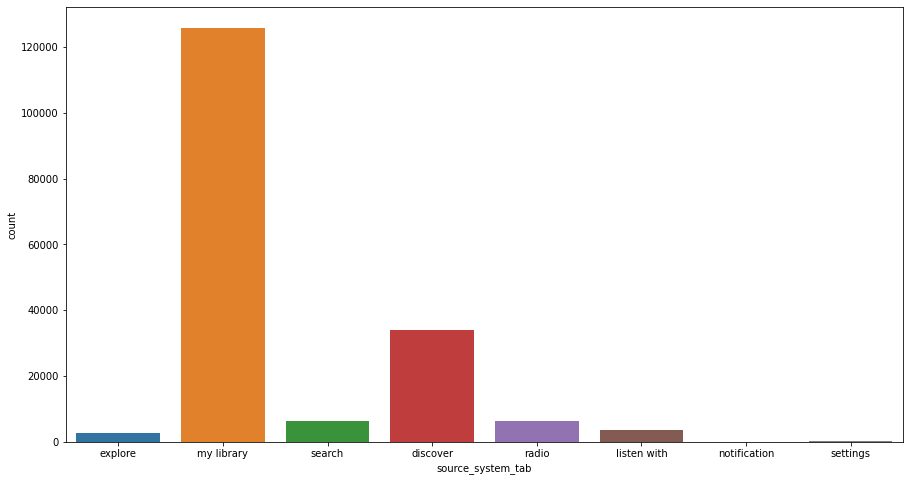

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x = train['source_system_tab'])

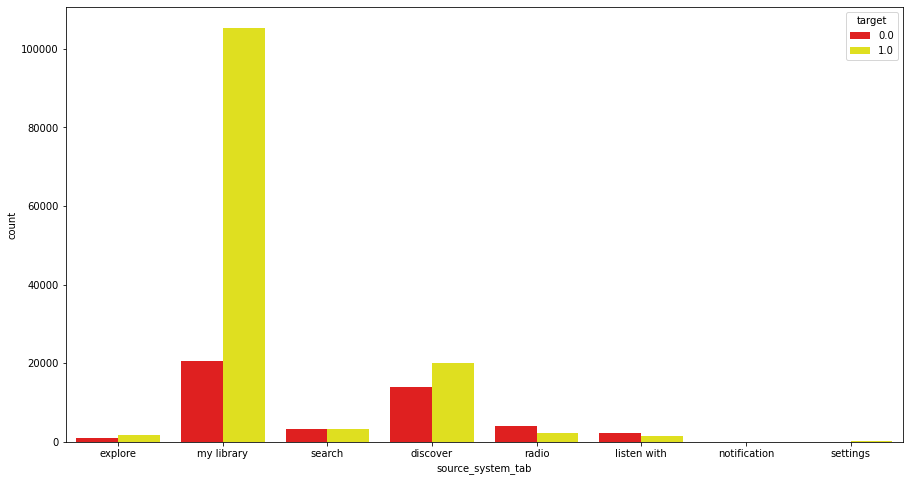

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x = train['source_system_tab'],palette=['red','yellow'],hue=train['target'])


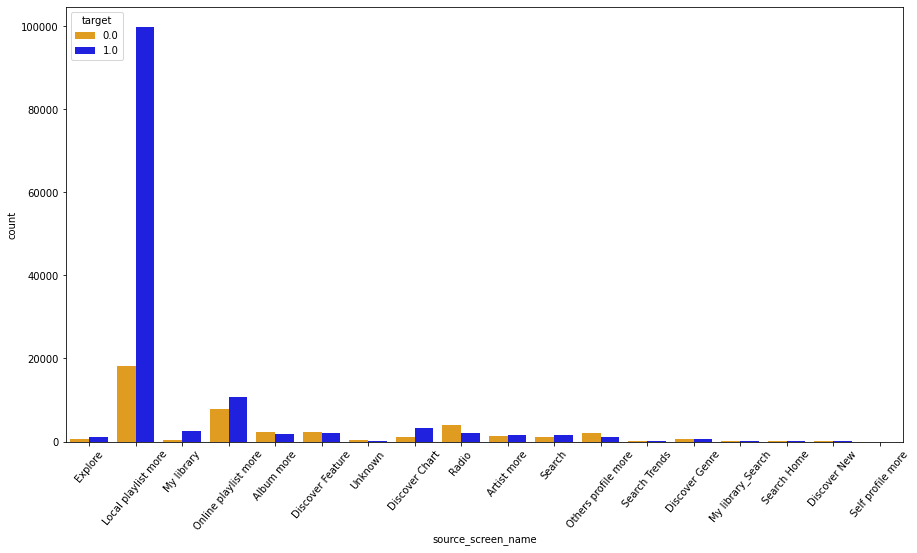

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x = train['source_screen_name'],palette=['orange','blue'],hue=train['target'])
plt.xticks(rotation =50)
plt.show()


In [26]:
# Function to plot histograms for categories

def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

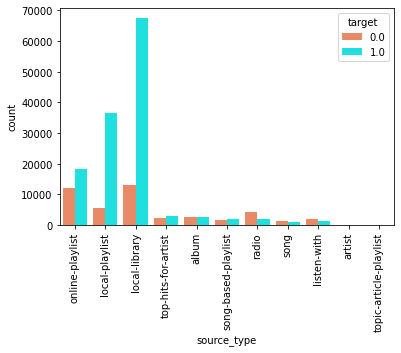

In [31]:
sns.countplot(x = train['source_type'],palette=['coral','cyan'],
              hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

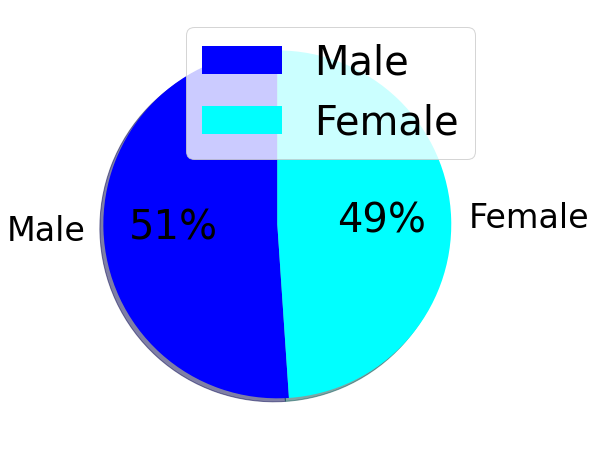

In [35]:

plt.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#0000FF','#00FFFF']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

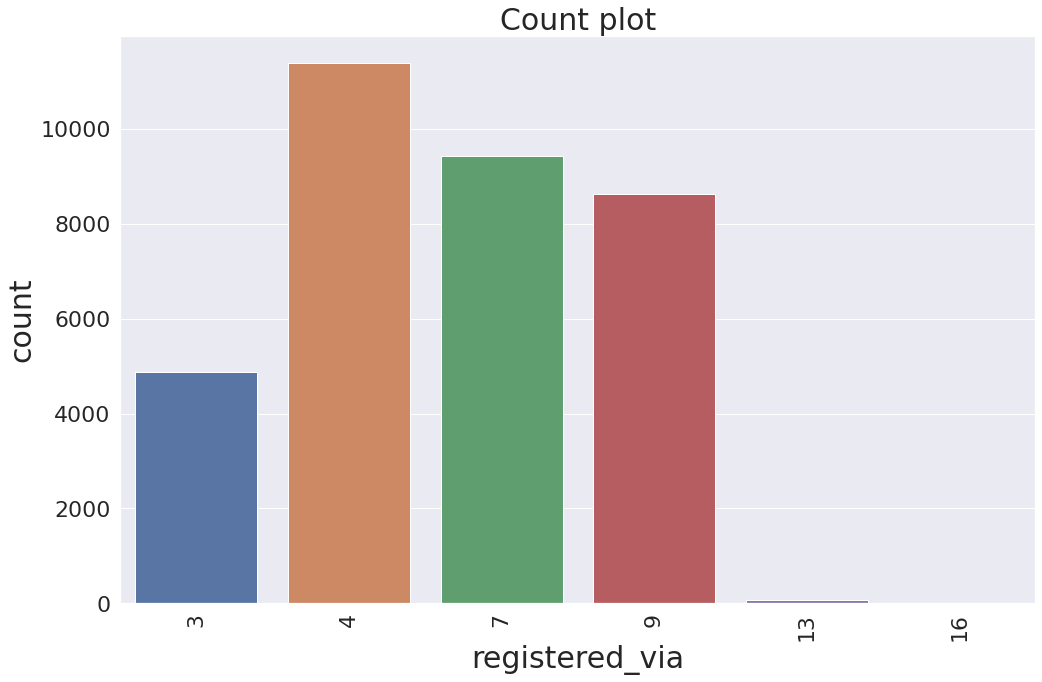

In [36]:
count_plot_function(members, 'registered_via')


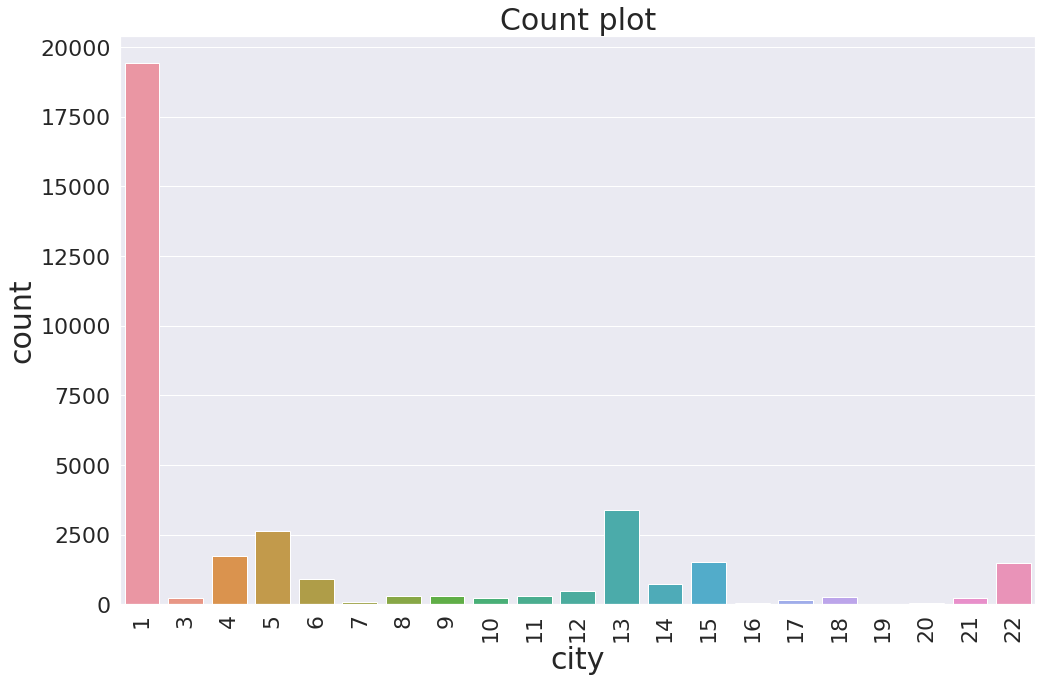

In [37]:
count_plot_function(members, 'city')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for Registration')

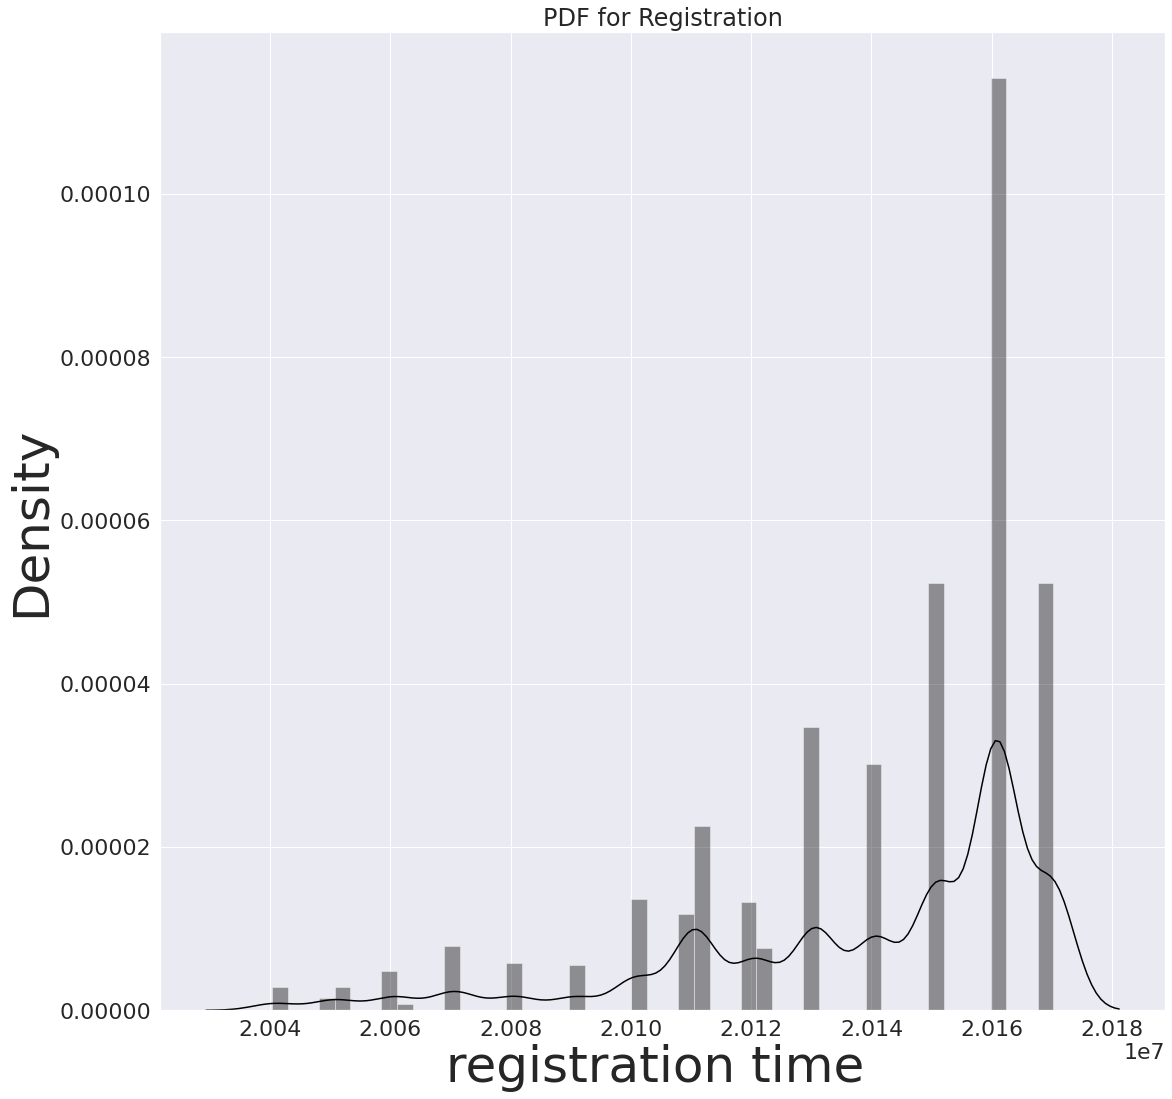

In [38]:
plt.figure(figsize = (18, 18)) 
sns.distplot(members.registration_init_time,color='black')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')